# Восстановление золота из руды

## Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Данные находятся в трёх файлах:
- gold_industry_train.csv — обучающая выборка;
- gold_industry_test.csv — тестовая выборка;
- gold_industry_full.csv — исходные данные.`

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

**Инструкция по выполнению проекта**

**1. Подготовьте данные**

1.1. Откройте файлы и изучите их.
    
Путь к файлам:

    /datasets/gold_industry_train.csv
    
    /datasets/gold_industry_test.csv
    
    /datasets/gold_industry_full.csv
    
1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

1.4. Проведите предобработку данных.

**2. Проанализируйте данные**

2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишите выводы.

2.2.  Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

2.3. Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

**3. Постройте модель**

3.1. Напишите функцию для вычисления итоговой sMAPE.

3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

# Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

In [ ]:
try:
    df = pd.read_csv('/datasets/gold_industry_train.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_train.csv')

In [ ]:
try:
    df = pd.read_csv('/datasets/gold_industry_test.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_test.csv')

In [ ]:
try:
    df = pd.read_csv('/datasets/gold_industry_full.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_full.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


**Посчитаем эффективность обогащения**

In [6]:
C = df_full['rougher.output.concentrate_au']
F = df_full['rougher.input.feed_au']
T = df_full['rougher.output.tail_au']

rougher_output_recovery_calc = (C*(F - T))/(F*(C - T))*100

#создадим новый столбец в датафрейме
df_full['rougher_output_recovery_calc'] = rougher_output_recovery_calc

print(df_full['rougher_output_recovery_calc'].head())
print('------------------------------------')
print(df_full['rougher.output.recovery'].head())

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher_output_recovery_calc, dtype: float64
------------------------------------
0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64


**Вычислим MAE**

In [7]:
print("MAE", mean_absolute_error(df_full['rougher_output_recovery_calc'], 
                          df_full['rougher.output.recovery']))

MAE 9.871121473701021e-15


**Вывод:**

`Величина ошибки между табличным и рассчитаным значением rougher_output_recovery крайне мала. Табличные данные достоверны.`

**Индексация**

`По условию задания, данные индексируются датой и временем получения информации (признак date). Переведём значение даты в индекс `

In [8]:
df_test = df_test.set_index('date')
df_train = df_train.set_index('date')
df_full = df_full.set_index('date')

**Обработаем пропуски:**

In [9]:
df_full.isna().sum().sum()

4481

In [10]:
df_train.isna().sum().sum()

3050

In [11]:
df_test.isna().sum().sum()

375

In [15]:
# посмотрим на оставшиеся пропуски

In [16]:
#check
df_train.isna().sum().sort_values(ascending=True)

rougher.input.feed_au                         0
rougher.output.tail_pb                        0
rougher.output.tail_sol                       0
primary_cleaner.input.feed_size               0
primary_cleaner.state.floatbank8_a_level      0
                                           ... 
final.output.concentrate_sol                192
primary_cleaner.output.concentrate_sol      265
rougher.input.floatbank11_xanthate          407
rougher.state.floatbank10_e_air             429
secondary_cleaner.output.tail_sol           920
Length: 86, dtype: int64

**Изучим, какие значения встречаются в параметрах с пропусками:**

In [17]:
#check
df_train[['secondary_cleaner.output.tail_sol', 
         'rougher.state.floatbank10_e_air', 
         'rougher.input.floatbank11_xanthate']].head(10)

,secondary_cleaner.output.tail_sol,rougher.state.floatbank10_e_air,rougher.input.floatbank11_xanthate
date,,,
2016-01-15 00:00:00,8.764648,1404.472046,6.005818
2016-01-15 01:00:00,9.001494,1399.227084,6.012594
2016-01-15 02:00:00,8.842896,1399.180945,6.204633
2016-01-15 03:00:00,9.122857,1400.943157,6.196578
2016-01-15 04:00:00,8.871028,1401.560902,6.194897
2016-01-15 05:00:00,9.302669,1403.393100,6.202362
2016-01-15 06:00:00,9.103047,1397.853265,6.200515
2016-01-15 07:00:00,9.369209,1396.580752,6.798354
2016-01-15 08:00:00,9.437044,1402.033682,6.800021


**Отдельные значения данных похожи на соседние.  Пропуски заполним данными соседних ячеек через ffill**

In [18]:
df_full = df_full.fillna(method = 'ffill')
df_train = df_train.fillna(method = 'ffill')
df_test = df_test.fillna(method = 'ffill')

display(df_full.isna().sum().sum())
display(df_train.isna().sum().sum())
display(df_test.isna().sum().sum())

0

0

0

**Проанализируем признаки, недоступные в тестовой выборке**

In [19]:
count = 0
for column in df_train.columns:
    if column not in df_test.columns:
        count+=1
        print(column)
print()
print(count)

rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_au
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_au
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
secondary_cleaner.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.output.tail_sol
final.output.concentrate_au
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_au
final.output.ta

**Вывод**

`Как следует из описания проекта, "некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков."`

## Промежуточный вывод:

`Данные изучены.`

`Вычислена величина ошибки MAE между табличными и рассчитаными значениями rougher_output_recovery. Выяснено, что табличные  данные достоверны.`

`Обработаны пропуски в данных тестовой и обучающей выборок.`

`Изучены параметры, отсутствующие в тестовой выборке.`



# Анализ данных

**Исследуем изменение концентрации элементов на каждом этапе**

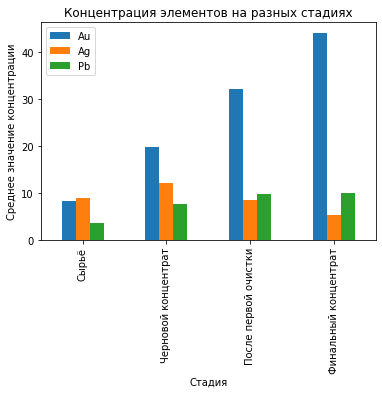

In [20]:
df = pd.DataFrame({'Стадия': ['Сырьё', 'Черновой концентрат', 'После первой очистки', 'Финальный концентрат'],
 'Au': [df_full['rougher.input.feed_au'].mean(), df_full['rougher.output.concentrate_au'].mean(), df_full['primary_cleaner.output.concentrate_au'].mean(), df_full['final.output.concentrate_au'].mean()],
 'Ag': [df_full['rougher.input.feed_ag'].mean(), df_full['rougher.output.concentrate_ag'].mean(), df_full['primary_cleaner.output.concentrate_ag'].mean(), df_full['final.output.concentrate_ag'].mean()],
 'Pb': [df_full['rougher.input.feed_pb'].mean(), df_full['rougher.output.concentrate_pb'].mean(), df_full['primary_cleaner.output.concentrate_pb'].mean(), df_full['final.output.concentrate_pb'].mean()]
                  })

#plot columns on bar chart
fig, ax = plt.subplots()
ax.set_title('Концентрация элементов на разных стадиях')
ax.set_xlabel('Стадия')
ax.set_ylabel('Среднее значение концентрации')

df[['Стадия', 'Au', 'Ag', 'Pb']].plot(ax=ax, x='Стадия', kind='bar');

**Взглянем на распределения концентраций:**

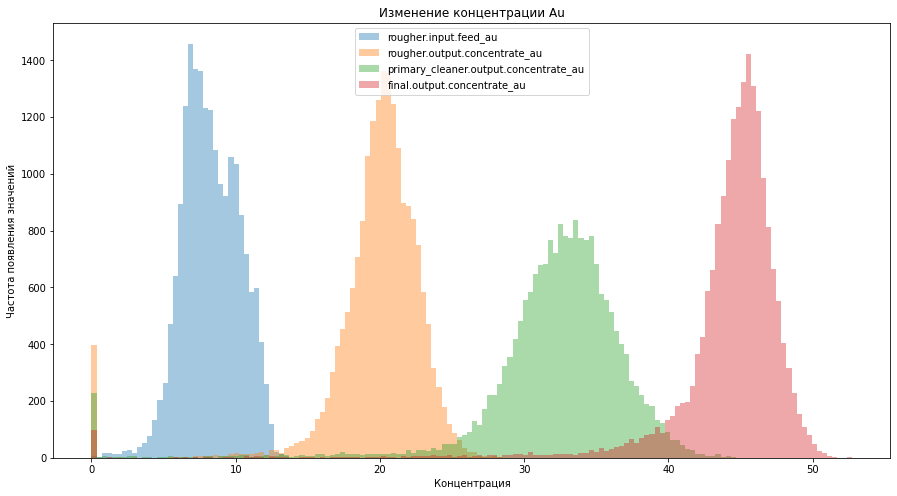

In [21]:
Au = ['rougher.input.feed_au', 
      'rougher.output.concentrate_au', 
      'primary_cleaner.output.concentrate_au', 
      'final.output.concentrate_au']
  
fig, ax = plt.subplots()


df_full[Au].plot(ax=ax, kind='hist', bins=150, figsize=(15,8), legend=True, alpha=0.4)
ax.set_title('Изменение концентрации Au')
ax.set_xlabel('Концентрация')
ax.set_ylabel('Частота появления значений');

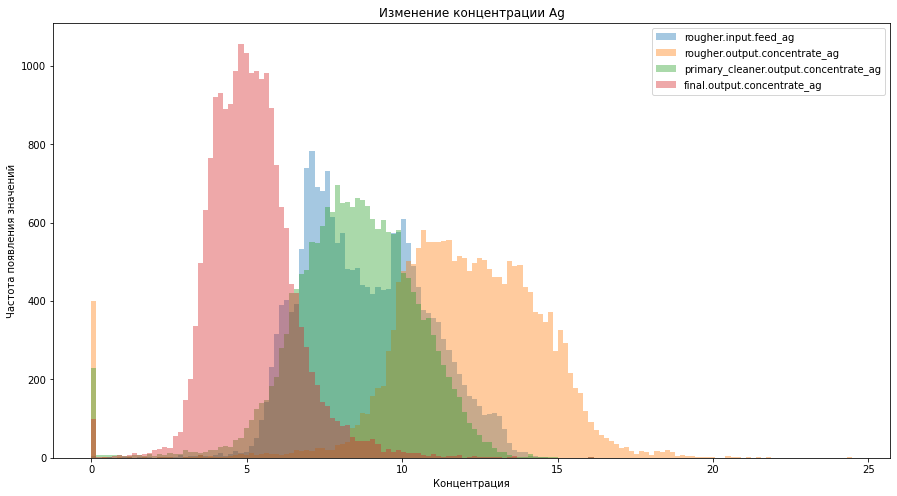

In [22]:
Ag = ['rougher.input.feed_ag', 
      'rougher.output.concentrate_ag', 
      'primary_cleaner.output.concentrate_ag', 
      'final.output.concentrate_ag']

legend = 'Изменение концентрации Ag'
    
fig, ax = plt.subplots()


df_full[Ag].plot(kind='hist', bins=150, figsize=(15,8), ax=ax, legend=True, alpha=0.4)
ax.set_title(legend)
ax.set_xlabel('Концентрация')
ax.set_ylabel('Частота появления значений');

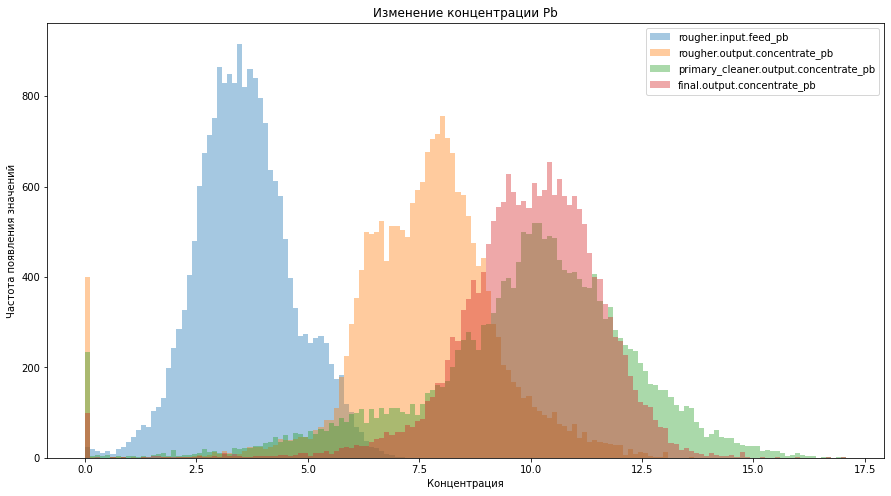

In [23]:
Pb = ['rougher.input.feed_pb', 
      'rougher.output.concentrate_pb', 
      'primary_cleaner.output.concentrate_pb', 
      'final.output.concentrate_pb']

legend = 'Изменение концентрации Pb'
    
fig, ax = plt.subplots()

df_full[Pb].plot(kind='hist', bins=150, figsize=(15,8), ax=ax, alpha=0.4)

ax.set_title(legend)
ax.set_xlabel('Концентрация')
ax.set_ylabel('Частота появления значений');

**Вывод:**

- Концентрация золота в среднем повышается приблизительно на 10-15% после каждой стадии.

- Концентрация серебра в среднем повышается на 2-3% на стадии чернового концентрата, а затем с такой же скоростью снижается на каждом следующем этапе так, что финальная концентрация приблизительно равна 5%.

- Концентрация свинца в среднем достигает наивысшего значения в 10% уже после первой очистки.

- В полной выборке обранужено значительное количество выбросов данных при нулевом значении. Стоит изучить обучающую выборку.

**При анализе полной выборки на всех трёх графиках замечены выбросы. Изучим обучающую выборку и обработаем выбросы:**

**Au:**

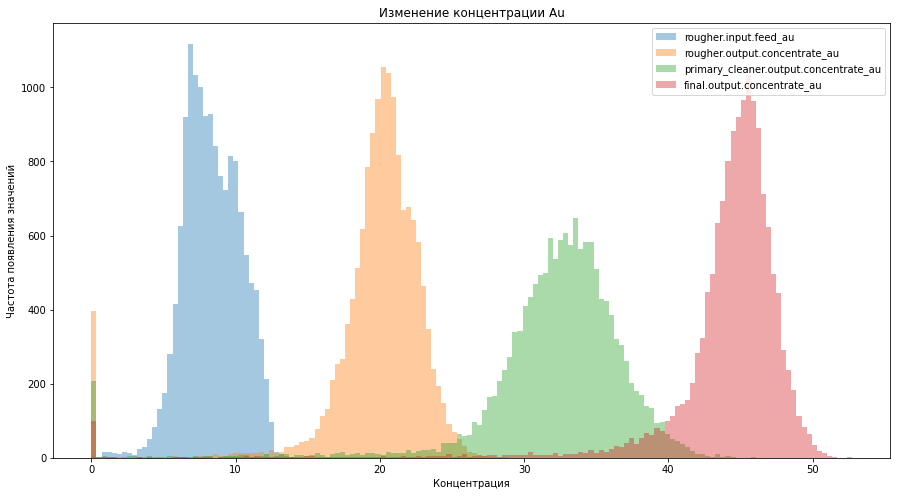

In [24]:
Au = ['rougher.input.feed_au', 
      'rougher.output.concentrate_au', 
      'primary_cleaner.output.concentrate_au', 
      'final.output.concentrate_au']
  
fig, ax = plt.subplots()


df_train[Au].plot(ax=ax, kind='hist', bins=150, figsize=(15,8), legend=True, alpha=0.4)

ax.set_title('Изменение концентрации Au')
ax.set_xlabel('Концентрация')
ax.set_ylabel('Частота появления значений');

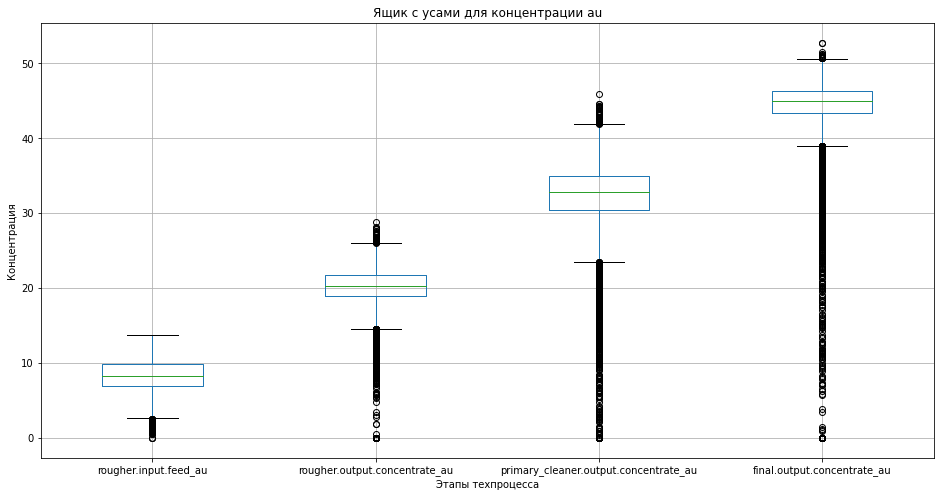

In [25]:
df_train.boxplot(column=['rougher.input.feed_au', 
                        'rougher.output.concentrate_au', 
                        'primary_cleaner.output.concentrate_au', 
                        'final.output.concentrate_au'], figsize=(16,8))

plt.title('Ящик с усами для концентрации au')
plt.xlabel('Этапы техпроцесса')
plt.ylabel('Концентрация')
plt.show()

In [26]:
print(df_train[df_train['rougher.output.concentrate_au'] > 9].value_counts().sum()/
      df_train['rougher.output.concentrate_au'].value_counts().sum()*100)

print(df_train[df_train['primary_cleaner.output.concentrate_au'] > 20].value_counts().sum()/
      df_train['primary_cleaner.output.concentrate_au'].value_counts().sum()*100)

print(df_train[df_train['final.output.concentrate_au'] > 35].value_counts().sum()/
      df_train['final.output.concentrate_au'].value_counts().sum()*100)

96.92708690582344
96.57040949310652
96.71445229439605


In [27]:
df_train = df_train[(df_train['rougher.output.concentrate_au'] > 9) & 
                    (df_train['primary_cleaner.output.concentrate_au'] > 17) &
                    (df_train['final.output.concentrate_au'] > 30)]

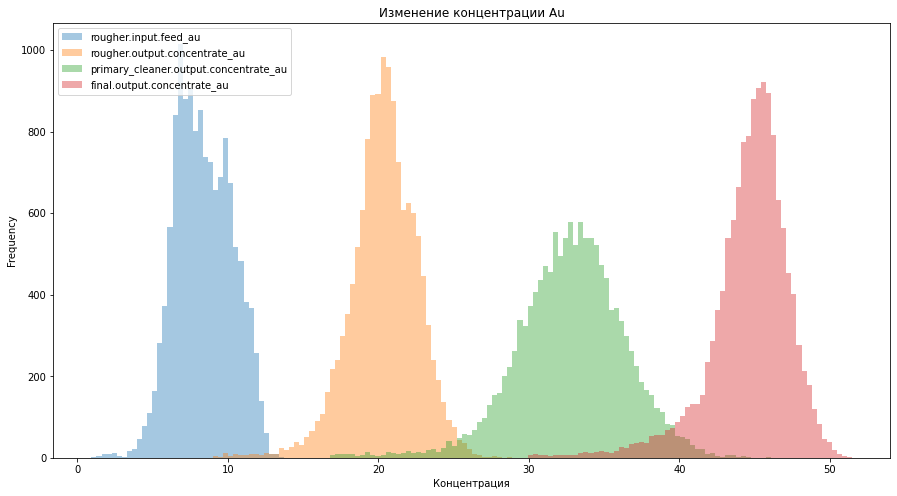

In [28]:
#check
Au = ['rougher.input.feed_au', 
      'rougher.output.concentrate_au', 
      'primary_cleaner.output.concentrate_au', 
      'final.output.concentrate_au']
  
fig, ax = plt.subplots()
ax.set_title('Изменение концентрации Au')
ax.set_xlabel('Концентрация')
ax.set_ylabel('Частота появления значений')

df_train[Au].plot(ax=ax, kind='hist', bins=150, figsize=(15,8), legend=True, alpha=0.4);

**Ag:**

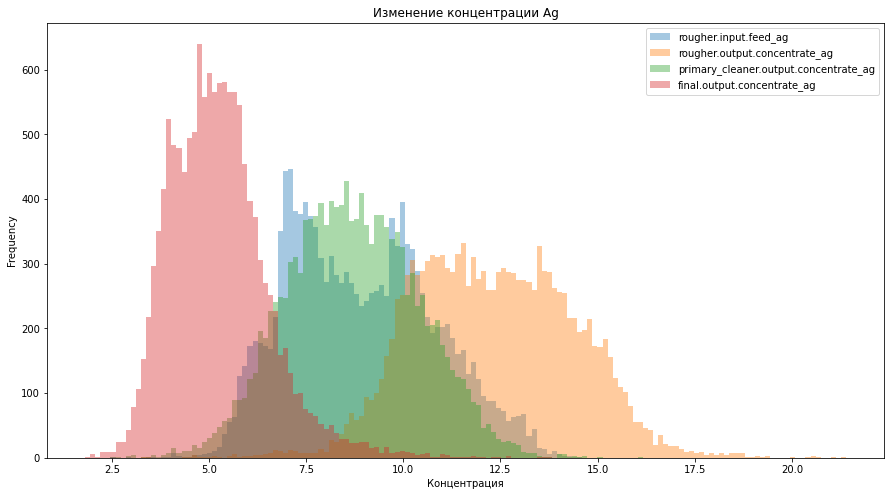

In [29]:
Ag = ['rougher.input.feed_ag', 
      'rougher.output.concentrate_ag', 
      'primary_cleaner.output.concentrate_ag', 
      'final.output.concentrate_ag']
  
fig, ax = plt.subplots()
ax.set_title('Изменение концентрации Ag')
ax.set_xlabel('Концентрация')
ax.set_ylabel('Частота появления значений')

df_train[Ag].plot(ax=ax, kind='hist', bins=150, figsize=(15,8), legend=True, alpha=0.4);

**Выбросов не наблюдается, но всё равно проверим:**

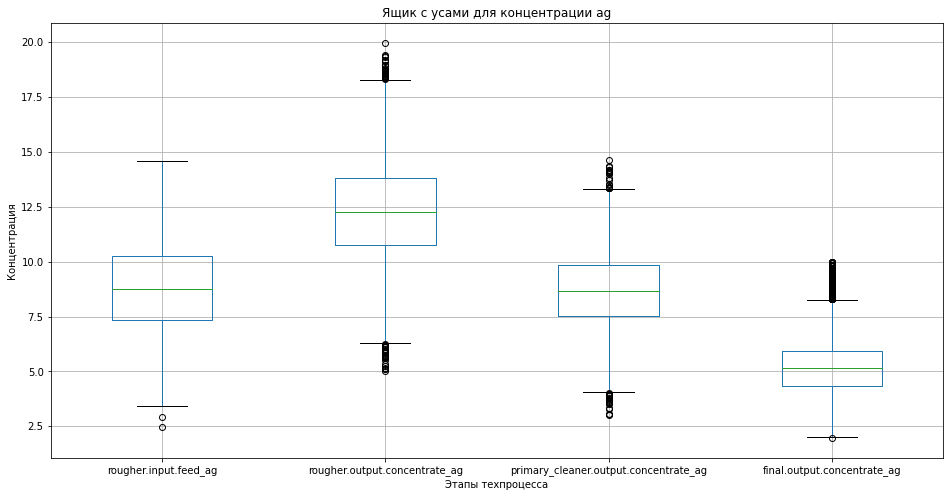

In [42]:
df_train.boxplot(column=['rougher.input.feed_ag', 
                        'rougher.output.concentrate_ag', 
                        'primary_cleaner.output.concentrate_ag', 
                        'final.output.concentrate_ag'], figsize=(16,8))
plt.title('Ящик с усами для концентрации ag')
plt.xlabel('Этапы техпроцесса')
plt.ylabel('Концентрация')
plt.show()

In [31]:
print(df_train[(df_train['rougher.output.concentrate_ag'] > 5.5)&
               (df_train['rougher.output.concentrate_ag'] < 19)].value_counts().sum()/
      df_train['rougher.output.concentrate_ag'].value_counts().sum()*100)

print(df_train[(df_train['primary_cleaner.output.concentrate_ag'] > 3)&
              (df_train['primary_cleaner.output.concentrate_ag'] < 14)].value_counts().sum()/
      df_train['primary_cleaner.output.concentrate_ag'].value_counts().sum()*100)

print(df_train[df_train['final.output.concentrate_ag'] < 9].value_counts().sum()/
      df_train['final.output.concentrate_ag'].value_counts().sum()*100)

99.74816680245908
99.7926079549663
98.72602029479299


In [32]:
df_train = df_train[(df_train['rougher.output.concentrate_ag'] > 5)&
               (df_train['rougher.output.concentrate_ag'] < 20) & 
                    (df_train['primary_cleaner.output.concentrate_ag'] > 3)&
              (df_train['primary_cleaner.output.concentrate_ag'] < 15) &
                    (df_train['final.output.concentrate_ag'] < 10)]

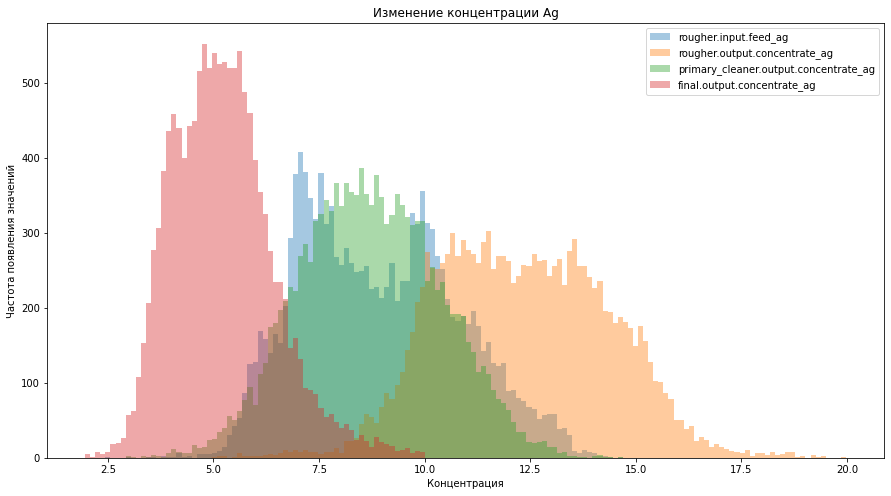

In [41]:
#check
Ag = ['rougher.input.feed_ag', 
      'rougher.output.concentrate_ag', 
      'primary_cleaner.output.concentrate_ag', 
      'final.output.concentrate_ag']
  
fig, ax = plt.subplots()

df_train[Ag].plot(ax=ax, kind='hist', bins=150, figsize=(15,8), legend=True, alpha=0.4)
ax.set_title('Изменение концентрации Ag')
ax.set_xlabel('Концентрация')
ax.set_ylabel('Частота появления значений');

**Pb:**

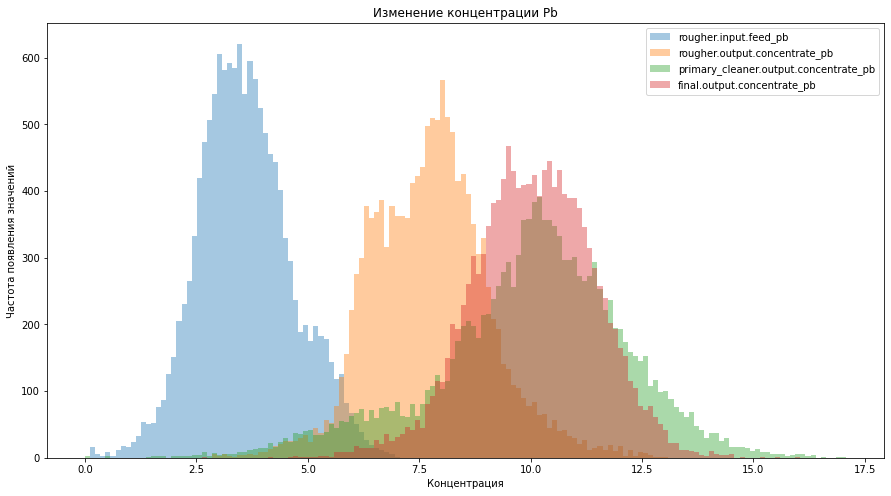

In [34]:
Pb = ['rougher.input.feed_pb', 
      'rougher.output.concentrate_pb', 
      'primary_cleaner.output.concentrate_pb', 
      'final.output.concentrate_pb']
  
fig, ax = plt.subplots()


df_train[Pb].plot(ax=ax, kind='hist', bins=150, figsize=(15,8), legend=True, alpha=0.4)
ax.set_title('Изменение концентрации Pb')
ax.set_xlabel('Концентрация')
ax.set_ylabel('Частота появления значений');

**Выбросов также не наблюдается, но всё равно проверим:**

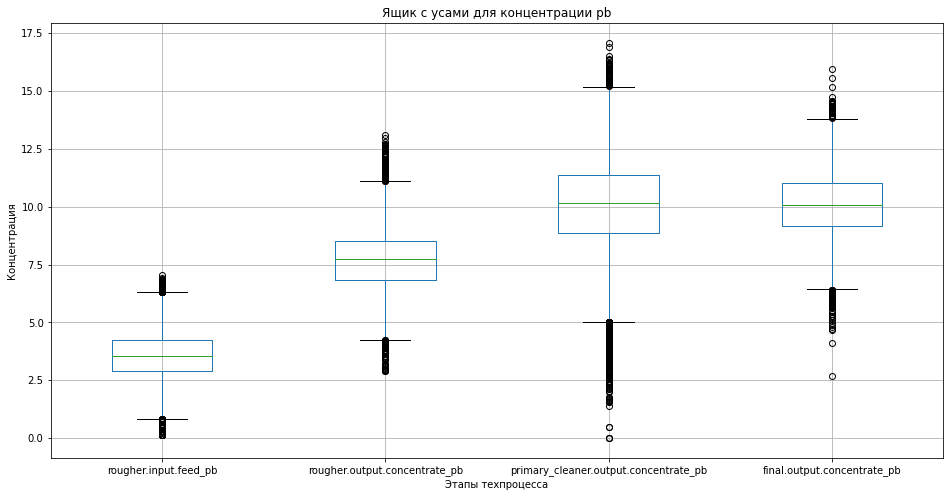

In [35]:
df_train.boxplot(column=['rougher.input.feed_pb', 
                        'rougher.output.concentrate_pb', 
                        'primary_cleaner.output.concentrate_pb', 
                        'final.output.concentrate_pb'], figsize=(16,8))
plt.title('Ящик с усами для концентрации pb')
plt.xlabel('Этапы техпроцесса')
plt.ylabel('Концентрация')
plt.show()

In [36]:
print(df_train[(df_train['rougher.output.concentrate_pb'] > 3)&
              (df_train['rougher.output.concentrate_pb'] < 12)].value_counts().sum()/
      df_train['rougher.output.concentrate_pb'].value_counts().sum()*100)

print(df_train[(df_train['primary_cleaner.output.concentrate_pb'] > 3)&
              (df_train['primary_cleaner.output.concentrate_pb'] < 16)].value_counts().sum()/
      df_train['primary_cleaner.output.concentrate_pb'].value_counts().sum()*100)

print(df_train[(df_train['final.output.concentrate_pb'] > 5)&
              (df_train['final.output.concentrate_pb'] < 15)].value_counts().sum()/
      df_train['final.output.concentrate_pb'].value_counts().sum()*100)


99.60459564309161
99.50014920919129
99.9253954043569


In [37]:
df_train = df_train[((df_train['rougher.output.concentrate_pb'] > 3)&
              (df_train['rougher.output.concentrate_pb'] < 12)) & 
                  ((df_train['primary_cleaner.output.concentrate_pb'] > 3)&
              (df_train['primary_cleaner.output.concentrate_pb'] < 16)) &
                  ((df_train['final.output.concentrate_pb'] > 5)&
              (df_train['final.output.concentrate_pb'] < 15))]

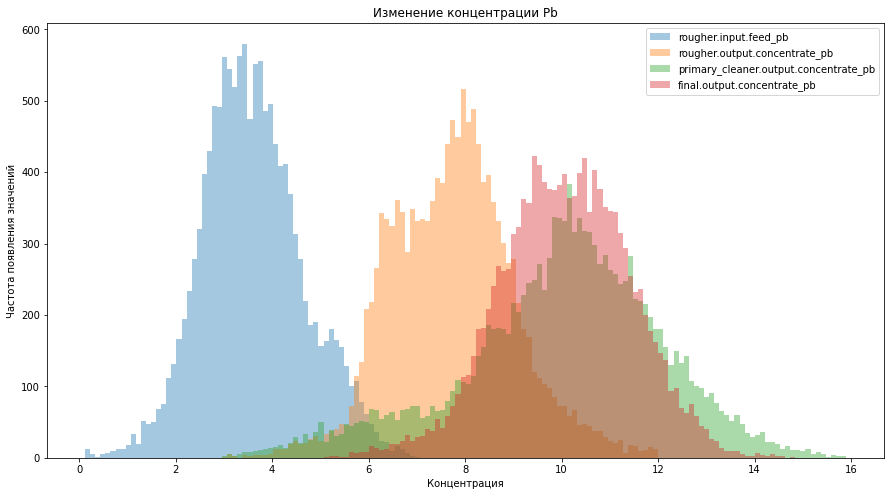

In [38]:
#check
Pb = ['rougher.input.feed_pb', 
      'rougher.output.concentrate_pb', 
      'primary_cleaner.output.concentrate_pb', 
      'final.output.concentrate_pb']

legend = 'Изменение концентрации Pb'
    
fig, ax = plt.subplots()


df_train[Pb].plot(kind='hist', bins=150, figsize=(15,8), ax=ax, alpha=0.4)

ax.set_title(legend)
ax.set_xlabel('Концентрация')
ax.set_ylabel('Частота появления значений');

**Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Из-за разного размера выборок по частоте распределения трудно оценить, одинаковые ли размеры у гранул. Для этого исследуем плотность распределения:**

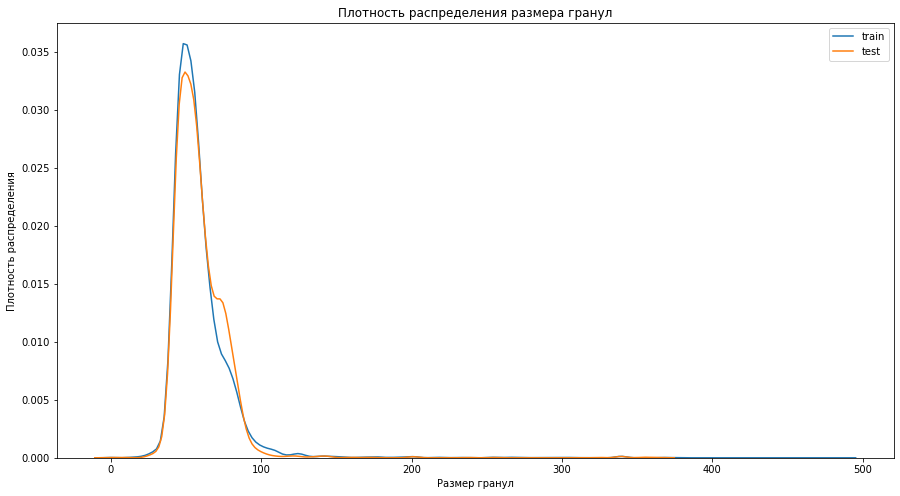

In [39]:
data1 = df_train['rougher.input.feed_size']
data2 = df_test['rougher.input.feed_size']

plt.figure(figsize=(15,8))

sns.kdeplot(data1, label='train')
sns.kdeplot(data2, label='test')

plt.xlabel('Размер гранул')
plt.ylabel('Плотность распределения')
plt.title('Плотность распределения размера гранул')

plt.legend()

plt.show()

**Вывод:**
`Плотности распределения размеров гранул исходного сырья в обучающей и тестовой выборке не имеют значимых различий.`

**Исследуем суммарную концентрацию металлов на разных стадиях:**

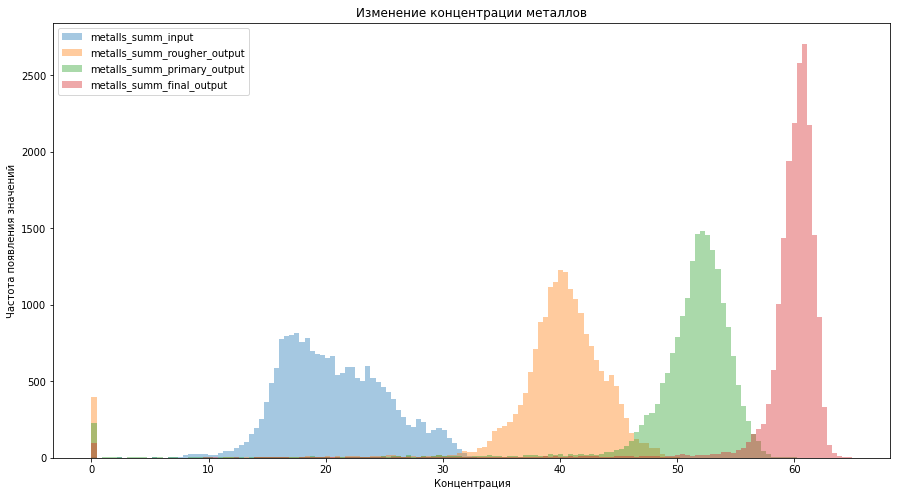

In [40]:
metalls_summ_input = df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb']
metalls_summ_rougher_output = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb']
metalls_summ_primary_output = df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb']
metalls_summ_final_output = df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb']

df_full['metalls_summ_input'] = metalls_summ_input
df_full['metalls_summ_rougher_output'] = metalls_summ_rougher_output
df_full['metalls_summ_primary_output'] = metalls_summ_primary_output
df_full['metalls_summ_final_output'] = metalls_summ_final_output

summs = ['metalls_summ_input', 'metalls_summ_rougher_output', 'metalls_summ_primary_output', 'metalls_summ_final_output']
legend = 'Изменение концентрации металлов'    
fig, ax = plt.subplots()

df_full[summs].plot(kind='hist', bins=150, figsize=(15,8), ax=ax, legend = True, alpha=0.4)

ax.set_title(legend)
ax.set_xlabel('Концентрация')
ax.set_ylabel('Частота появления значений');

**Вывод:**

`Суммарная концентрация металлов повышается с каждой стадией`

## Промежуточный вывод:

`Исследовано распределение концентраций металлов на каждом этапе.`

`Обработаны выбросы по параметрам концентрации металлов на каждом этапе для обучающей выборки.`

`Исследовано наличие разницы между обучающей и тестовой выборкой для параметра размера гранул сырья.`

`Исследована суммарная концентрация металлов на каждом этапе.`

# Модель

**Напишем функцию для вычисления итоговой sMAPE:**

In [51]:
def smape(target, predictions):
    return 1/len(target)*np.sum(np.abs(target-predictions)/(np.abs(target)+np.abs(predictions))*2*100)

In [52]:
def overall_smape(rougher, final):
    return 0.25*rougher+0.75*final

**В тестовой выборке нет параметров, которые есть в обучающей. Добавим их:**

In [53]:
df_test['rougher.output.recovery'] = df_full[df_full.index.isin(df_test.index)]['rougher.output.recovery']
df_test['final.output.recovery'] = df_full[df_full.index.isin(df_test.index)]['final.output.recovery']

**Проверим данные на пропуски:**

In [54]:
df_test.isna().sum().sum()

0

**Нам потребуется обучить две модели для итогового sMAPE. Для этого распределим признаки по категориям:**

In [57]:
columns_rougher = ['rougher.input.feed_ag',                       
'rougher.input.feed_pb',                      
'rougher.input.feed_rate',                   
'rougher.input.feed_size',                   
'rougher.input.feed_sol',                     
'rougher.input.feed_au',                      
'rougher.input.floatbank10_sulfate',           
'rougher.input.floatbank10_xanthate',        
'rougher.input.floatbank11_sulfate',           
'rougher.input.floatbank11_xanthate',         
'rougher.state.floatbank10_a_air',            
'rougher.state.floatbank10_a_level',           
'rougher.state.floatbank10_b_air',             
'rougher.state.floatbank10_b_level',           
'rougher.state.floatbank10_c_air',             
'rougher.state.floatbank10_c_level',          
'rougher.state.floatbank10_d_air',            
'rougher.state.floatbank10_d_level',          
'rougher.state.floatbank10_e_air',            
'rougher.state.floatbank10_e_level',           
'rougher.state.floatbank10_f_air',             
'rougher.state.floatbank10_f_level']

In [58]:
columns_final = ['primary_cleaner.input.sulfate',  
'primary_cleaner.input.depressant',            
'primary_cleaner.input.feed_size',             
'primary_cleaner.input.xanthate'  ,            
'primary_cleaner.state.floatbank8_a_air',      
'primary_cleaner.state.floatbank8_a_level',    
'primary_cleaner.state.floatbank8_b_air'   ,   
'primary_cleaner.state.floatbank8_b_level'  ,  
'primary_cleaner.state.floatbank8_c_air'    ,  
'primary_cleaner.state.floatbank8_c_level'  ,  
'primary_cleaner.state.floatbank8_d_air'    ,  
'primary_cleaner.state.floatbank8_d_level'  ,

                  
'secondary_cleaner.state.floatbank2_a_air'  ,  
'secondary_cleaner.state.floatbank2_a_level' , 
'secondary_cleaner.state.floatbank2_b_air'   , 
'secondary_cleaner.state.floatbank2_b_level' , 
'secondary_cleaner.state.floatbank3_a_air'   , 
'secondary_cleaner.state.floatbank3_a_level' , 
'secondary_cleaner.state.floatbank3_b_air'   , 
'secondary_cleaner.state.floatbank3_b_level' ,
'secondary_cleaner.state.floatbank4_a_air'   , 
'secondary_cleaner.state.floatbank4_a_level' , 
'secondary_cleaner.state.floatbank4_b_air'   , 
'secondary_cleaner.state.floatbank4_b_level' , 
'secondary_cleaner.state.floatbank5_a_air'   , 
'secondary_cleaner.state.floatbank5_a_level' , 
'secondary_cleaner.state.floatbank5_b_air'   , 
'secondary_cleaner.state.floatbank5_b_level' , 
'secondary_cleaner.state.floatbank6_a_air'   ,
'secondary_cleaner.state.floatbank6_a_level']

**Признаки для первой модели:**

In [59]:
df_rougher_features_train = df_train[columns_rougher]
df_rougher_target_train = df_train['rougher.output.recovery']

**Признаки для второй модели:**

In [60]:
df_final_features_train = df_train[columns_final]
df_final_target_train = df_train['final.output.recovery']

**Отмасштабируем признаки:**

In [61]:
rougher_scaler = StandardScaler()

rougher_scaler.fit(df_rougher_features_train[columns_rougher])
df_rougher_features_train[columns_rougher] = rougher_scaler.transform(df_rougher_features_train[columns_rougher])
#check
df_rougher_features_train[columns_rougher].head()

/tmp/ipykernel_731/1989961034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rougher_features_train[columns_rougher] = rougher_scaler.transform(df_rougher_features_train[columns_rougher])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-1.501840,-1.266635,0.444520,-0.154340,0.017647,-1.034047,-0.141631,-0.025822,-0.087156,-0.003018,...,1.529219,0.528483,1.409151,0.412840,1.817746,0.256515,1.813848,0.129328,2.276884,0.193688
2016-01-15 01:00:00,-1.469460,-1.284775,0.461176,-0.076116,-0.196374,-1.038112,-0.146283,-0.027829,-0.044863,0.002742,...,1.516676,0.257975,1.400059,0.274963,1.825379,0.280565,1.784377,0.206764,2.179034,0.224140
2016-01-15 02:00:00,-1.493269,-1.387017,0.506402,-0.065990,-0.152109,-1.100623,-0.161544,0.145143,-0.064988,0.165996,...,1.508799,0.256997,1.396190,0.272724,1.822124,0.280556,1.784117,0.222481,2.182547,0.217313
2016-01-15 03:00:00,-1.532264,-1.504059,0.626377,-0.053677,0.028528,-1.231722,-0.249176,0.150379,-0.125436,0.159148,...,1.512812,0.246143,1.397821,0.273519,1.811928,0.277399,1.794019,0.220921,2.182065,0.229628
2016-01-15 04:00:00,-1.522878,-1.745160,0.606720,-0.129870,-0.481487,-1.475878,-0.451987,0.146451,-0.319613,0.157719,...,1.513643,0.264256,1.399475,0.271280,1.821690,0.281352,1.797490,0.240359,2.187509,0.219320


In [62]:
final_scaler = StandardScaler()

final_scaler.fit(df_final_features_train[columns_final])
df_final_features_train[columns_final] = final_scaler.transform(df_final_features_train[columns_final])
#check
df_final_features_train.head()

/tmp/ipykernel_731/2247237043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features_train[columns_final] = final_scaler.transform(df_final_features_train[columns_final])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-0.462270,0.369803,-0.113851,-0.082639,-0.322478,-0.237375,-0.326183,-0.757440,-0.286197,-0.211150,...,-0.910685,-0.376781,-0.566396,-0.682320,-1.027349,-0.312087,-0.745963,-0.387801,-0.894421,-2.731901
2016-01-15 01:00:00,-0.495877,0.420778,-0.113851,-0.055665,-0.115575,-0.303939,-0.136138,-0.237313,-0.089594,-0.232175,...,-0.915466,-0.439067,-0.597299,-0.630953,-1.006186,-0.365045,-0.764171,-0.390750,-0.922256,-2.567354
2016-01-15 02:00:00,-0.537449,0.730362,-0.113851,-0.077777,0.083476,-0.273638,0.053284,-0.260646,0.106173,-0.282587,...,-0.911039,-0.377461,-0.605108,-0.627946,-1.000288,-0.363882,-0.758584,-0.389037,-0.916742,-2.611928
2016-01-15 03:00:00,-0.573052,0.732141,-0.113851,-0.067159,0.071031,-0.305503,0.055397,-0.231375,0.093382,-0.277981,...,-0.906853,-0.343096,-0.587160,-0.628861,-1.019017,-0.337471,-0.765597,-0.382098,-0.920947,-2.573033
2016-01-15 04:00:00,-0.671433,0.911656,-0.113851,-0.041685,0.081779,-0.239490,0.061432,-0.251698,0.087946,-0.283173,...,-0.908647,-0.322054,-0.596774,-0.626739,-1.027335,-0.408234,-0.781536,-0.384753,-0.922567,-2.613812


**Отмасштабируем признаки тестовой выборки:**

In [63]:
df_test[columns_rougher] = rougher_scaler.transform(df_test[columns_rougher])
df_test[columns_final] = final_scaler.transform(df_test[columns_final])

df_rougher_target_test = df_test['rougher.output.recovery']
df_final_target_test = df_test['final.output.recovery']
df_rougher_features_test = df_test[columns_rougher]
df_final_features_test = df_test[columns_final]

**Обучим модели:**

`Будем использовать модели LinearRegression и RandomForestRegression`

**Создадим скорер для написанной ранее функции smape**

In [64]:
smape_score = make_scorer(smape, greater_is_better=False)

## LinearRegression:

In [65]:
#Rougher
model_linreg_rough = LinearRegression()
model_linreg_rough.fit(df_rougher_features_train, df_rougher_target_train)
smape_linreg_rough = cross_val_score(model_linreg_rough, df_rougher_features_train, df_rougher_target_train, cv=5, n_jobs=-1, verbose=10, scoring=smape_score)
print('rougher SMAPE:',  - smape_linreg_rough.mean())

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.007) total time=   0.3s
[CV] START .....................................................................
[CV] END ............................... score: (test=-5.439) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] END ............................... score: (test=-4.701) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-4.375) total time=   0.1s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.607) total time=   0.3s
rougher SMAPE: 6.225729009000963


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [66]:
#Final
model_linreg_final = LinearRegression()
model_linreg_final.fit(df_rougher_features_train, df_rougher_target_train)
smape_linreg_final = cross_val_score(model_linreg_final, df_final_features_train, df_final_target_train, cv=5, n_jobs=-1, verbose=10, scoring=smape_score)
print('final SMAPE:',  - smape_linreg_final.mean())

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.682) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ............................... score: (test=-7.570) total time=   1.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.920) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV] END ............................... score: (test=-8.499) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV] END .............................. score: (test=-10.398) total time=   0.3s
final SMAPE: 9.013876887471714


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


In [67]:
overall_smape_linreg = overall_smape(smape_linreg_rough.mean(), smape_linreg_final.mean())
print('total SMAPE:',  - overall_smape_linreg)

total SMAPE: 8.316839917854026


## RandomForestRegressor:

In [68]:
model_fr_rougher = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=12345)
smape_score_rough_fr = cross_val_score(model_fr_rougher, df_rougher_features_train, df_rougher_target_train, cv=5, n_jobs=-1, verbose=10, scoring=smape_score)
print('SMAPE:', - smape_score_rough_fr.mean())

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-7.974) total time=   1.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] END ............................... score: (test=-4.472) total time=   1.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] END ............................... score: (test=-4.544) total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s remaining:    0.0s


[CV] END ............................... score: (test=-4.905) total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.5s remaining:    0.0s


[CV] END ............................... score: (test=-6.135) total time=   1.0s
SMAPE: 5.606047913233347


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s finished


In [69]:
model_fr_final = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=12345)
smape_score_final_fr = cross_val_score(model_fr_final, df_final_features_train, df_final_target_train, cv=5, n_jobs=-1, verbose=10, scoring=smape_score)
print('SMAPE:', - smape_score_final_fr.mean())

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.912) total time=   1.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] END ............................... score: (test=-8.703) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ............................... score: (test=-8.974) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.441) total time=   1.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.9s remaining:    0.0s


[CV] END ............................... score: (test=-8.966) total time=   1.5s
SMAPE: 9.199163860716194


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished


In [70]:
overall_smape_forest = overall_smape(smape_score_rough_fr.mean(), smape_score_final_fr.mean())
print('total SMAPE:', - overall_smape_forest)

total SMAPE: 8.300884873845483


**Вывод:**

`Лучшие значения SMAPE на модели случайного леса достигаются при количестве деревьев 20 и глубине 4.`

`Лучшие значения SMAPE из двух моделей демонстрирует модель случайного леса.`

**Проверим на тестовой выборке:**

In [71]:
model_rougher_fr = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=12345)
model_rougher_fr.fit(df_rougher_features_train, df_rougher_target_train)

predict_rougher_fr = model_rougher_fr.predict(df_rougher_features_test)

smape_rough_fr = smape(df_rougher_target_test, predict_rougher_fr)

In [72]:
model_final_fr = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=12345)
model_final_fr.fit(df_final_features_train, df_final_target_train)

predict_final_fr = model_final_fr.predict(df_final_features_test)

smape_final_fr = smape(df_final_target_test, predict_final_fr)

In [73]:
smape_total_forest = overall_smape(smape_rough_fr.mean(), smape_final_fr.mean())
print('SMAPE модели RandomForestRegressor на тестовой выборке:', smape_total_forest)

SMAPE модели RandomForestRegressor на тестовой выборке: 6.887830925764225


**Проверим константной модели:**

In [74]:
df_test['target_train_rougher_mean'] = df_rougher_target_train.mean()
df_test['target_train_final_mean'] = df_final_target_train.mean()
smape_const = smape(df_test['target_train_rougher_mean'], df_rougher_target_test)*0.25 + smape(df_test['target_train_final_mean'], df_final_target_test)* 0.75
print( "SMAPE const : ", smape_const)

SMAPE const :  8.428665750370016


**Вывод:**

`SMAPE тестовой модели лучше константной`

## Итоговый вывод:

`Данные подготовлены.`

`Выяснено, что эффективность обогащения посчитана верно.`

`Проведена предобработка данных. Заполнены пропуски. Выполнена индексация данных по дате.`

`Исследовано изменение концентраций металлов на разных этапах. Как и следовало ожидать, значительно возрастает только концентрация целевого металла - золота.`

`Исследована разница размеров гранул исходного сырья на обучающей и тестовой выборках. ПОстроены графики распределения частоты и плотности. Значимого различия не обнаружено.`

`Исследовано изменение суммарной концентрации металлов на разных этапах. Как и следовало ожидать, суммарная концентрация значительно возрастает c каждым этапом.`

`Построены модели для вычисления итоговой SMAPE - линейная регрессия и случайный лес. Оценено качество моделей кросс-валидацией. Лучшее значение SMAPE демонстрирует модель случайного леса.`

`Модель случайного леса оценена с помощью модели на тестовой выборке. Показатели тестовой выборки немного лучше, чем обучающей. Отклонения в пределах допустимых.`

`Модель случайного леса оценена с помощью константной модели. Показатели константной модели хуже, чем тестовой. Выбранная модель корректна.`